In [7]:
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm
import time

%matplotlib inline

In [6]:
!pip install opencv-python 

In [8]:
for folder, _, files in os.walk('Leaf disease'):
    print(folder)

Leaf disease
Leaf disease\Bacterial leaf blight
Leaf disease\Bacterial Leaf blight masks
Leaf disease\Bacterial_leaf_blight_seg
Leaf disease\Brown spot
Leaf disease\Brown spot masks
Leaf disease\Brown_spot_seg
Leaf disease\Leaf smut
Leaf disease\leaf smut masks
Leaf disease\Leaf_smut_seg


0%|          | 0/40 [00:00<?, ?it/s]

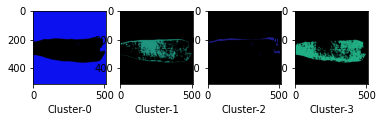

2%|▎         | 1/40 [00:06<04:27,  6.86s/it]

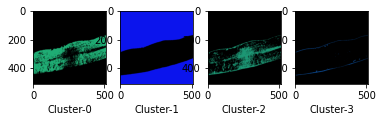

5%|▌         | 2/40 [00:14<04:31,  7.15s/it]

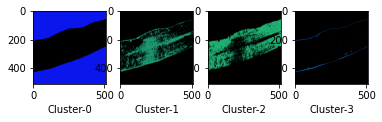

8%|▊         | 3/40 [00:21<04:21,  7.08s/it]

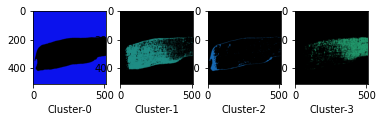

10%|█         | 4/40 [00:29<04:24,  7.35s/it]

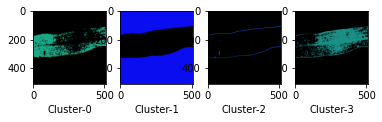

12%|█▎        | 5/40 [00:40<04:57,  8.50s/it]

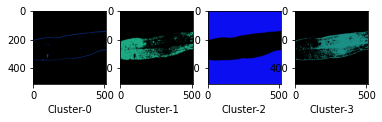

15%|█▌        | 6/40 [00:50<05:04,  8.97s/it]

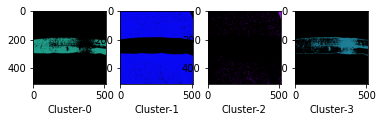

18%|█▊        | 7/40 [00:56<04:18,  7.83s/it]

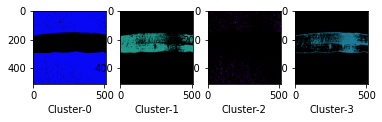

20%|██        | 8/40 [01:01<03:45,  7.03s/it]

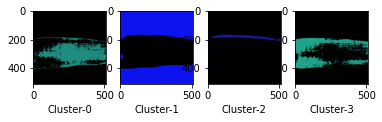

22%|██▎       | 9/40 [01:06<03:23,  6.58s/it]

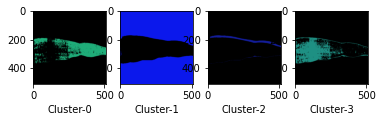

25%|██▌       | 10/40 [01:11<02:57,  5.92s/it]

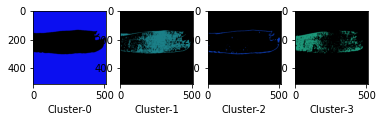

28%|██▊       | 11/40 [01:18<03:02,  6.31s/it]

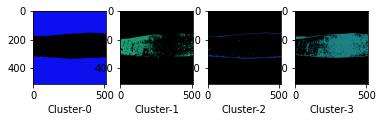

30%|███       | 12/40 [01:24<02:55,  6.27s/it]

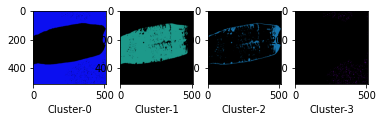

32%|███▎      | 13/40 [01:31<02:53,  6.43s/it]

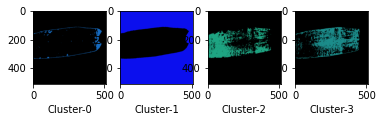

35%|███▌      | 14/40 [01:37<02:42,  6.26s/it]

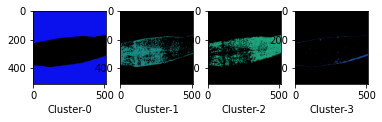

38%|███▊      | 15/40 [01:43<02:36,  6.27s/it]

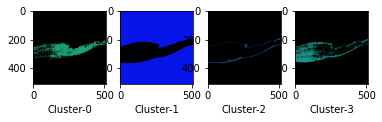

40%|████      | 16/40 [01:49<02:26,  6.11s/it]

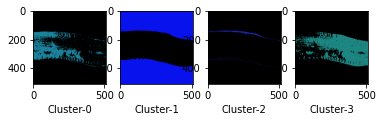

42%|████▎     | 17/40 [01:55<02:23,  6.23s/it]

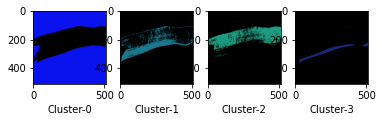

45%|████▌     | 18/40 [02:01<02:14,  6.13s/it]

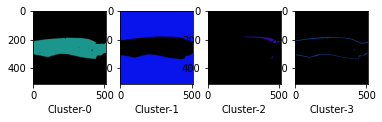

48%|████▊     | 19/40 [02:06<02:01,  5.78s/it]

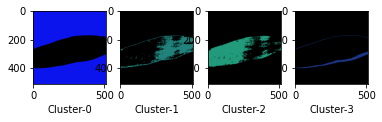

50%|█████     | 20/40 [02:11<01:51,  5.57s/it]

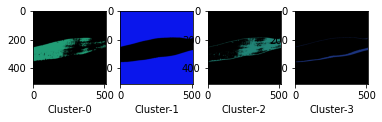

52%|█████▎    | 21/40 [02:18<01:50,  5.81s/it]

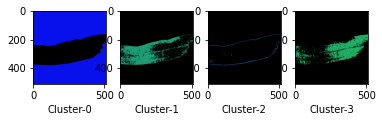

55%|█████▌    | 22/40 [02:26<01:58,  6.58s/it]

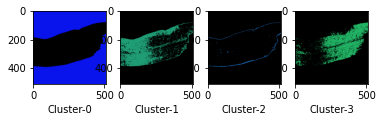

57%|█████▊    | 23/40 [02:35<01:54,  6.76s/it]


KeyboardInterrupt: 

In [9]:

def seperate_cluster(image: object, label: object) -> object:
    images = []
    for i, segVal in enumerate(np.unique(label)):
        mask = np.zeros(image.shape[:2], dtype="uint8")
        
        mask[label.reshape(image.shape[:2]) == segVal] = 255

        segmented_image = cv2.bitwise_and(image, image, mask=mask)
        
        images.append(segmented_image/256)
            
    fig, axs = plt.subplots(1, 4)
    for i in range(4):
        axs[i].imshow(images[i])
        axs[i].set_xlabel(f'Cluster-{i}')
        # axs[i].set_axis_off()
    plt.show()
    
    '''
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.suptitle('brown spot segments')
    ax1.imshow(images[0])
    ax2.imshow(images[1])
    ax3.imshow(images[2])
    ax4.imshow(images[3])  
    plt.show()
    '''



def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
            
    return image


for files in tqdm(os.listdir('Leaf disease\Leaf smut')):
    image = cv2.imread(os.path.join('Leaf disease\Leaf smut', files))
    image = image.astype('uint8')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image = cv2.resize(image, (512, 512))
    
    kmeans = KMeans(n_clusters=4, random_state=0).fit(image.reshape((-1, 3)))
    
    img = recreate_image(kmeans.cluster_centers_, kmeans.labels_, image.shape[0], image.shape[1])
    seperate_cluster(img, kmeans.labels_)


   